In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:

def l(x):
    return np.log(1 + np.exp(x))

beta = 0.02
theta = 0.5
gamma = .02
P0=1
S1=1.85
S2=2
"""
sum = l(theta * (b1 - b2)) + l(theta * (b2 - b1)) + 2 * l(0)
pi11 = pi22 = l(0)/sum
pi12 = l(theta*(b1-b2))/sum
pi21 = l(theta*(b2-b1))/sum
"""

def hood(y,t, beta, theta, gamma, P0, S1, S2):
    b1, b2 = y
    
    sum = l(theta * (b1 - b2)) + l(theta * (b2 - b1)) + 2 * l(0)
    pi11 = pi22 = l(0)/sum
    pi12 = l(theta*(b1-b2))/sum
    pi21 = l(theta*(b2-b1))/sum
    
    dydt = [b1**2 * (theta * -beta) +\
            b1 * (gamma * (pi11 - 1) - beta*P0)\
            + b2*gamma*pi21 + S1,
            b2**2 * (theta * -beta) +\
            b2 * (gamma * (pi22 - 1) - beta*P0)\
            + b1 * gamma * pi12 + S2]
    return dydt

y0 = [0, 0]
t = np.linspace(0,1000,10000)

In [110]:
hood([1.26599,1.26599], 5, beta, theta, gamma, P0, S1, S2)

[1.7959929931990002, 1.945992993199]

In [111]:
sol = odeint(hood, y0, t, args=(beta, theta, gamma, P0, S1, S2))

In [112]:
sol.shape


(10000, 2)

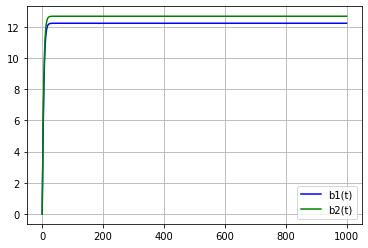

In [113]:
plt.plot(t, sol[ :, 0], 'b', label='b1(t)')
plt.plot(t, sol[ :, 1], 'g', label='b2(t)')
plt.grid()
plt.legend()

In [96]:

def l(x):
    return np.log(1 + np.exp(x))

beta = 0.023
theta = 0.0055
gamma = .5
P1=5
P2=3
S1=3
S2=2
"""
sum = l(theta * (b1 - b2)) + l(theta * (b2 - b1)) + 2 * l(0)
pi11 = pi22 = l(0)/sum
pi12 = l(theta*(b1-b2))/sum
pi21 = l(theta*(b2-b1))/sum
"""

def hood(y,t, beta, theta, gamma, P0, S1, S2):
    b1, b2 = y
    
    sum = l(theta * (b1 - b2)) + l(theta * (b2 - b1)) + 2 * l(0)
    pi11 = pi22 = l(0)/sum
    pi12 = l(theta*(b1-b2))/sum
    pi21 = l(theta*(b2-b1))/sum
    
    dydt = [b1**2 * (theta * -beta) +\
            b1 * (gamma * (pi11 - 1) - beta*P1)\
            + b2*gamma*pi21 + S1,
            b2**2 * (theta * - beta) +\
            b2 * (gamma * (pi22 - 1) - beta*P2)\
            + b1 * gamma * pi12 + S2]
    return dydt

y0 = [0, 0]
t = np.linspace(0,100,1000)

In [97]:
sol = odeint(hood, y0, t, args=(beta, theta, gamma, P0, S1, S2))

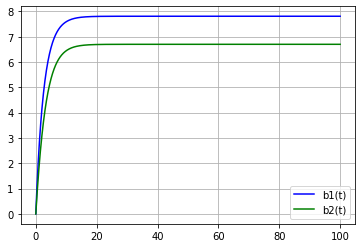

In [98]:
plt.plot(t, sol[ :, 0], 'b', label='b1(t)')
plt.plot(t, sol[ :, 1], 'g', label='b2(t)')
plt.grid()
plt.legend()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Hood1D:
    """
    z: sites
    n: turns
    p: police presence in each site
    b: initial criminal population
    s: crime level for each site
    beta: arrest rate
    theta: police reactivity
    """
    def __init__(self, z=2, n=10, p=None, b=None,
                 s=None, beta=0.1, theta=0.05):
        self.z = z
        self.n = n
        self.beta = beta
        self.theta = theta
        
        self.p = np.ones(z) if p is None else p
        self.b = np.ones(z) if b is None else b
        self.s = np.zeros(z) if s is None else s
        
        # initialize grids
        # B: criminals
        self.B = np.zeros((n, z))
        # P: police
        self.P = np.zeros((n, z))
        # A: arrests
        self.A = np.zeros((n, z))
        
        # initial conditions
        self.B[0] = self.b
        self.P[0] = self.p + self.theta * self.b
        self.A[0] = self.beta * self.P[0] * self.B[0]
        
        self.t = 0
    
    """
    transition function:
    For site i, returns array of length z;
    each entry is probability of moving to that
    site from i
    """
    def PI_ij(self, i):
        t = self.t
        p_ = self.P[t]
        x = np.log(1 + np.exp(p_[i] - p_))
        return x / x.sum()
        
    def step(self):
        t = self.t
        # the population at t is reduced by arrests at t
        b_ = self.B[t] - self.A[t]
        # the population moves based on police presence at t
        for i in range(self.z):
            self.B[t+1] += b_[i] * self.PI_ij(i)
        # population is increased by source at each site
        self.B[t+1] += self.s
        # police react to updated population
        self.P[t+1] = self.p + self.theta * self.B[t+1]
        # calulate arrests at t+1
        self.A[t+1] = self.beta * self.P[t+1] * self.B[t+1]
        
        self.t += 1
        
    def loop(self):
        for i in range(self.n - 1):
            self.step()
            
    def draw(self):
        a = self.B
        plt.imshow(a, cmap='plasma')
        plt.xticks([])
        plt.yticks([])
        
    def graph(self):
        z = self.z
        n = self.n
        colors = 'brgcmyk'
        fig, ax = plt.subplots()
        for i in range(z):
            ax.plot(range(n), self.B[:, i], '-' + colors[i % len(colors)], label='site ' + str(i))
        leg = ax.legend()
        plt.xlabel('TIME')
        plt.ylabel('B_i')

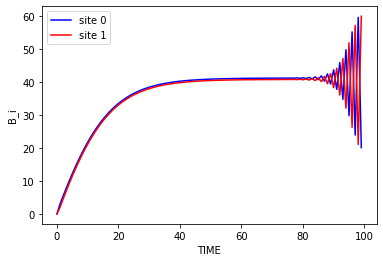

In [63]:
# start with two neighborhoods
p = np.array([1, 1])
b = np.array([0, 0])
s = np.array([3, 2])
hood0 = Hood1D(z=2, n=100, p=p, b=b, s=s, beta=.02, theta=0.05)
hood0.loop()
hood0.graph()
# plt.savefig('bvp_fig0.eps', format='eps')